Accuracy: 0.9528
Balanced Accuracy: 0.9545
ROC-AUC: 0.9973

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.94      0.97      0.95        32
           2       0.97      0.93      0.95        41
           3       0.91      0.97      0.94        30
           4       1.00      0.94      0.97        32
           5       0.94      0.94      0.94        36
           6       0.97      1.00      0.99        39
           7       0.91      1.00      0.95        31
           8       0.92      0.95      0.94        38
           9       0.95      0.85      0.90        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



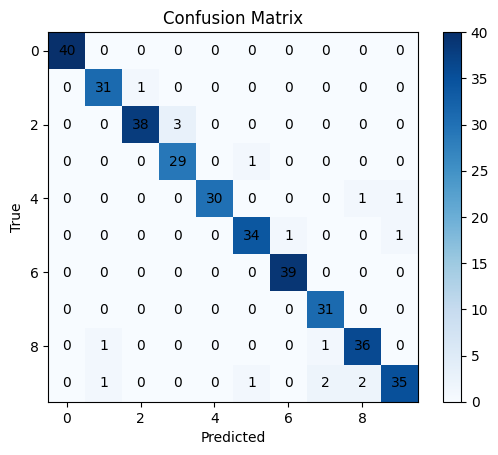

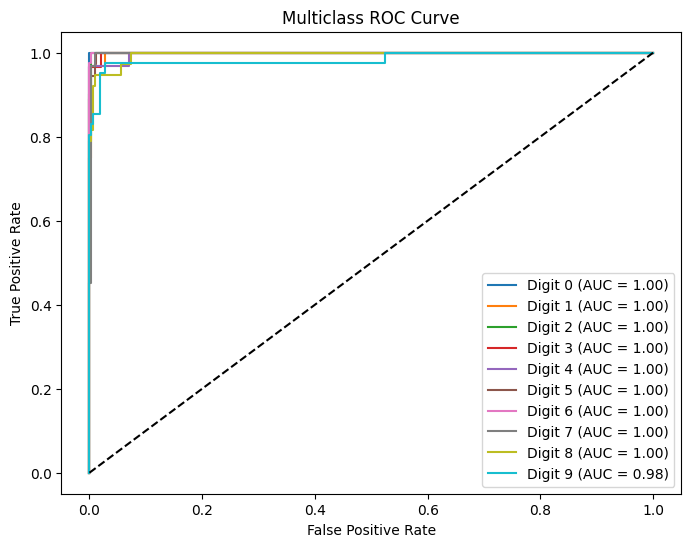

(Text(0.5, 1.0, 'Multiclass ROC Curve'),
 None)

In [ ]:



     

#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize 

# loading dataset
digits = datasets.load_digits()
X, Y = digits.data, digits.target
Y_bin = label_binarize(Y, classes=np.unique(Y))#converts the labels into a binary format 

# splitting data
X_train, X_test, Y_train, Y_test, Y_bin_train, Y_bin_test = train_test_split(X, Y, Y_bin, test_size=0.2, random_state=72)

# hyperparameter tuning
param_grid = [{"solver": ["svd"]}, {"solver": ["lsqr", "eigen"], "shrinkage": ["auto"]}]
grid_search = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, Y_train) #trains the model with the best parameters 



lda = grid_search.best_estimator_
Y_pred = lda.predict(X_test)
Y_prob = lda.predict_proba(X_test)

# evaluation
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(Y_test, Y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(Y_bin_test, Y_prob, multi_class='ovr'):.4f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

# confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.imshow(cm, cmap="Blues"), plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.title("Confusion Matrix"), plt.xlabel("Predicted"), plt.ylabel("True"), plt.show()

# ROC curve
plt.figure(figsize=(8,6))
for i in range(Y_bin.shape[1]):
    fpr, tpr, _ = roc_curve(Y_bin_test[:, i], Y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Digit {i} (AUC = {auc(fpr, tpr):.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate"), plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve"), plt.legend(), plt.show()

     